### Importacoes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import DataReader

### DataFrame

In [2]:
end = pd.to_datetime('today')
start = end - np.timedelta64(5, 'Y')

base = pd.DataFrame(DataReader('BBDC4.SA', 'yahoo', start, end))
# df.head()

In [3]:
df = pd.DataFrame(base.copy())

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,15.862987,15.862987,15.862987,15.862987,44977.0,12.687902
2016-04-12,16.608610,16.608610,16.608610,16.608610,83453.0,13.284278
2016-04-13,18.269470,18.269470,18.269470,18.269470,258267.0,14.612710
2016-04-14,16.961500,16.124809,16.824898,16.335405,24949493.0,13.065759
2016-04-15,16.546000,16.227261,16.454931,16.409397,20528028.0,13.124945


### funcoes

In [5]:
# medias simples, desliza em uma serie/df um determindado numero de periodoso padrao 20
def medias_delizantes(serie, periodos=20):
    df = pd.DataFrame(serie.rolling(window=periodos).mean())
    df.columns = [f'mean_{periodos}']
    return df

In [6]:
# retorna um DataFrame, para concatenar ao df, original
def media_exponencial_deslizante(df, periodos=10):
    df_mme = pd.DataFrame(pd.core.window.ExponentialMovingWindow(df, periodos).mean())
    df_mme.columns = [f'mme_{periodos}']
    return df_mme

In [7]:
# Recebe um Serie, retorna um df com a linha macd e o sinal
def macd(df, curta=12, longa=26, sinal=9):
    a = media_exponencial_deslizante(df, curta)
    b = media_exponencial_deslizante(df, longa)
    df_macd = pd.DataFrame(a.values - b.values)
    df_macd.columns = ['macd']
    df_macd[f'mme_macd_{sinal}'] = media_exponencial_deslizante(df_macd, sinal)
    return  df_macd

In [8]:
# Recebe um df e os periodos da media exponencial, e os periodos, e devolve um df com o ATR
# recebe apenas no padrao 'High', 'Low', 'Close'
def atr(df, periodos=14):
    
    data = df.copy()

    high = data['High']
    low = data['Low']
    close = data['Close']

    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift(1))
    data['tr2'] = abs(low - close.shift(1))
    
    tr = data[['tr0', 'tr1', 'tr2']].max(1)

    atr = media_exponencial_deslizante(tr, periodos)
    
    return atr

### Area Teste

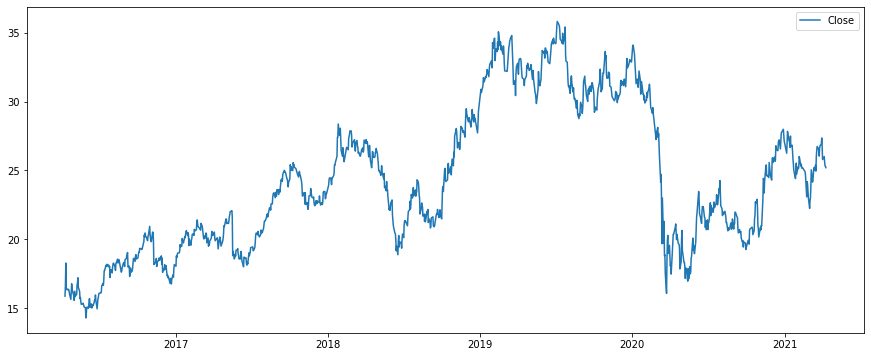

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Close')


plt.legend()
plt.show()

In [10]:
a = media_exponencial_deslizante(df['Close'], 12)
b = media_exponencial_deslizante(df['Close'], 26)
df_completo = pd.concat([df['Close'], a, b], axis=1)

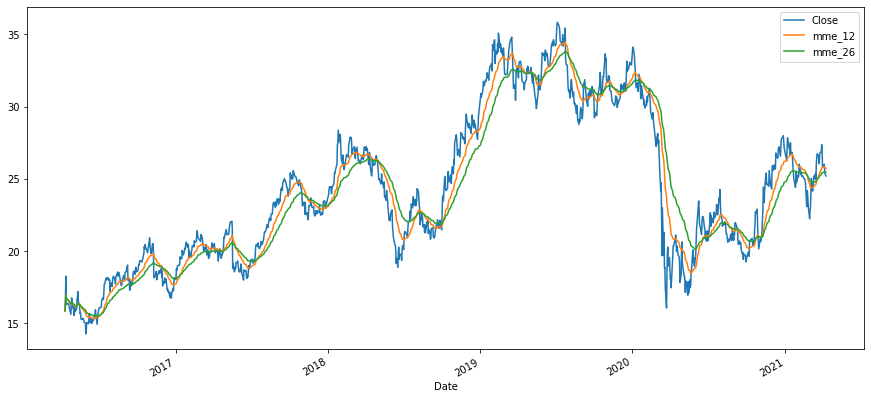

In [11]:
df_completo.plot(figsize=(15, 7))
plt.show()

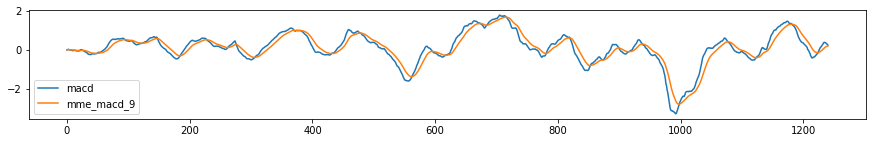

In [12]:
# MACD
macd(df['Close']).plot(figsize=(15, 2))
plt.show()

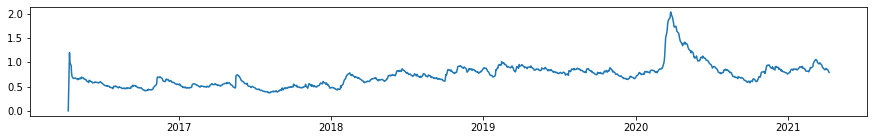

In [13]:
# ATR
plt.figure(figsize=(15, 2))
plt.plot(atr(df))
plt.show()